In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
pd.set_option('display.max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
path = "/content/drive/MyDrive/Black Chess Moves Analysis/twic_master.csv"
df = pd.read_csv(path)

<ipython-input-3-376df9a740e9>:2: DtypeWarning: Columns (10,13,14,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971319 entries, 0 to 1971318
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   twic_number     int64  
 1   White           object 
 2   Black           object 
 3   Date            object 
 4   EventDate       object 
 5   Event           object 
 6   Result          object 
 7   mainline_moves  object 
 8   Site            object 
 9   Online          bool   
 10  Round           object 
 11  ECO             object 
 12  Opening         object 
 13  WhiteFideId     object 
 14  BlackFideId     object 
 15  WhiteElo        float64
 16  BlackElo        float64
 17  Variation       object 
 18  WhiteTitle      object 
 19  BlackTitle      object 
 20  WhiteTeam       object 
 21  BlackTeam       object 
 22  EventType       object 
 23  FEN             object 
 24  SetUp           float64
 25  Variant         object 
 26  Board           float64
 27  PlyCount        float64
 28  EventCategor

In [5]:
df.head()

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,14109476.0,1503014.0,2527.0,2835.0,"Pelikan, Chelyabinsk variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2016192.0,4611500.0,2746.0,2483.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1510045.0,24101605.0,2620.0,2709.0,"Canal-Sokolsky attack, 3...Bd7",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,24130737.0,4115341.0,2719.0,2592.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,13302507.0,13300474.0,2637.0,2765.0,"two knights, Suttles variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['AvgElo'] = df[['WhiteElo','BlackElo']].mean(axis=1)
df['RatingDifference'] = abs(df['WhiteElo'] - df['BlackElo'])
df['BlackWins'] = df['Result'] == '0-1'

df[['WhiteElo','BlackElo','AvgElo','RatingDifference','Result','BlackWins']].head()

,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,BlackWins
0,2527.0,2835.0,2681.0,308.0,1-0,False
1,2746.0,2483.0,2614.5,263.0,1-0,False
2,2620.0,2709.0,2664.5,89.0,0-1,True
3,2719.0,2592.0,2655.5,127.0,1/2-1/2,False
4,2637.0,2765.0,2701.0,128.0,1-0,False


In [10]:
important_cols = ['White','Black','WhiteElo','BlackElo','AvgElo','RatingDifference','Result','Online','Opening','ECO','mainline_moves']
df[important_cols].sort_values('AvgElo',ascending=False).head()

,White,Black,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,Online,Opening,ECO,mainline_moves
340936,LCZero v0.24-sv-t60-3010,AllieStein v0.5_timefix-n14.0,3958.0,3936.0,3947.0,22.0,1/2-1/2,True,Sicilian,B90,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
1424578,LCZero v0.24-sv-t60-3010,AllieStein v0.5_timefix-n14.0,3958.0,3936.0,3947.0,22.0,1-0,True,Modern defence,A42,1. c4 g6 2. d4 Bg7 3. Nc3 d6 4. e4 Nc6 5. Be3 ...
1622686,LCZero v0.24-sv-t60-3010,Stockfish 202003092246,3958.0,3936.0,3947.0,22.0,1/2-1/2,True,Alekhine's defence,B03,1. e4 Nf6 2. e5 Nd5 3. d4 d6 4. c4 Nb6 5. f4 B...
1424585,LCZero v0.24-sv-t60-3010,Stockfish 202003092246,3958.0,3936.0,3947.0,22.0,1/2-1/2,True,Philidor,C41,1. e4 d6 2. d4 Nf6 3. Nc3 e5 4. Nf3 Nbd7 5. Bc...
340913,Stockfish 202003092246,LCZero v0.24-sv-t60-3010,3936.0,3958.0,3947.0,22.0,1/2-1/2,True,Alekhine's defence,B03,1. e4 Nf6 2. e5 Nd5 3. d4 d6 4. c4 Nb6 5. f4 B...


In [11]:
# Remove the outlier
df = df.drop(df[df['BlackElo'] == 204269.0].index)

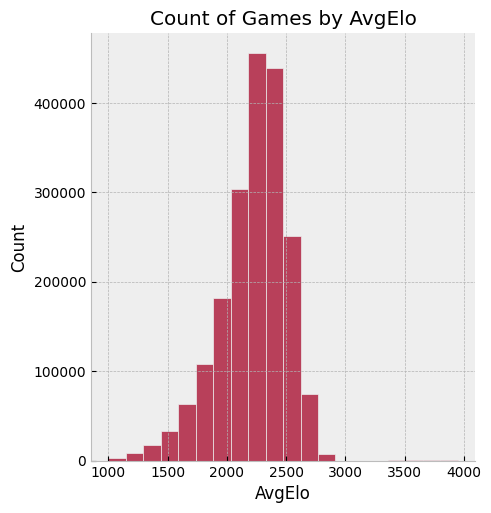

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

ax = sns.displot(df, x='AvgElo', bins=20, color=next(color_cycle)).set(title='Count of Games by AvgElo')
plt.show()

Many games have a high average rating (>2000) between the two players. But the average Elo is only part of the story. Are there games where one side is the heavy favorite?

In [13]:
df[important_cols].query("RatingDifference > 500").head()

,White,Black,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,Online,Opening,ECO,mainline_moves
92,"Indjic,A","Masrahi,Abdulrahman A",2620.0,1903.0,2261.5,717.0,1-0,False,Scotch game,C45,1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Bc5 5. ...
93,"Al Thebaiti,Ahmed M","Yuffa,D",1976.0,2572.0,2274.0,596.0,0-1,False,Queen's pawn game,A45,1. d4 Nf6 2. Bf4 g6 3. e3 Bg7 4. Nc3 d6 5. h4 ...
94,"Zvjaginsev,V","khayat,Abdullah F",2642.0,1723.0,2182.5,919.0,1-0,False,Reti,A05,1. Nf3 Nf6 2. g3 g6 3. Bg2 Bg7 4. O-O O-O 5. d...
95,"Ahmed,Hassan Abdillahi","Huzman,A",1570.0,2580.0,2075.0,1010.0,0-1,False,Gruenfeld,D94,1. d4 Nf6 2. c4 g6 3. Nf3 Bg7 4. Nc3 d5 5. e3 ...
96,"Predke,A","Al Turky,Fahad A",2622.0,1836.0,2229.0,786.0,1-0,False,French,C02,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Nc6 5. Nf3 Qb...


Since the goal is to find viable openings where black sees good results, it is worth noting that results against players much lower rated than the opponent might not be representative of good opening choices. Let's filter to look at only the games where players are within 200 points of each other. This means there is a smaller chance that a much stronger player can choose a "creative" opening and get away with it. We will also look at high-rated games.

In [14]:
df.query("AvgElo > 2000 and RatingDifference < 200")[important_cols].head()

,White,Black,WhiteElo,BlackElo,AvgElo,RatingDifference,Result,Online,Opening,ECO,mainline_moves
2,"Tari,A","Artemiev,V",2620.0,2709.0,2664.5,89.0,0-1,False,Sicilian,B52,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...
3,"Fedoseev,Vl3","Tregubov,P",2719.0,2592.0,2655.5,127.0,1/2-1/2,False,Petrov's defence,C42,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...
4,"Hovhannisyan,R","Aronian,L",2637.0,2765.0,2701.0,128.0,1-0,False,Robatsch defence,B06,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...
7,"Karjakin,Sergey","Yilmaz,M",2753.0,2636.0,2694.5,117.0,1-0,False,Sicilian,B90,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
8,"Goganov,A","Nepomniachtchi,I",2612.0,2763.0,2687.5,151.0,0-1,False,Gruenfeld,D85,1. d4 Nf6 2. c4 g6 3. Nc3 d5 4. cxd5 Nxd5 5. e...


In [15]:
# Filtering by Opening and ECO, and finding the total count of games that black wins. We separate online from live chess to understand the characteristics of each

op_live = df.query("AvgElo > 2000 and RatingDifference < 200 and Online == False").groupby(['Opening','ECO']).agg({'Result':'count', 'BlackWins': 'sum'}).reset_index()
op_online = df.query("AvgElo > 2000 and RatingDifference < 200 and Online == True").groupby(['Opening','ECO']).agg({'Result':'count', 'BlackWins': 'sum'}).reset_index()

op = df.query("AvgElo > 2000 and RatingDifference < 200").groupby(['Opening','ECO']).agg({'Result':'count', 'BlackWins': 'sum'}).reset_index()

In [16]:
op_live.sample(5)

,Opening,ECO,Result,BlackWins
28,Benoni,A71,30,9
588,Ruy Lopez,C74,163,52
537,Queen's pawn,D00,699,220
739,Three knights game,C46,133,36
706,Sicilian,B94,1734,582
